In [42]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 

data = pd.read_csv('./files_for_lab/csv_files/marketing_customer_analysis.csv')
data = data.drop_duplicates() # Drop duplicates 
data.columns = data.columns.str.lower().str.strip().str.replace(' ', '_') # Standardize column names
data = data.round(decimals = 2)
data = data.reindex(sorted(data.columns), axis=1).reset_index(drop = True) # Sort columns alphabetically
numerical = data.select_dtypes(include=np.number) # Select numerical columns 
categoricals = data.select_dtypes(include=object) # Select categorical columns


In [43]:
correlation_matrix = numerical.corr()
correlation_matrix

customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.024366   
income                                        0.024366  1.000000   
monthly_premium_auto                          0.396262 -0.016665   
months_since_last_claim                       0.011517 -0.026715   
months_since_policy_inception                 0.009418 -0.000875   
number_of_open_complaints                    -0.036343  0.006408   
number_of_policies                            0.021955 -0.008656   
total_claim_amount                            0.226451 -0.355254   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.396262                 0.011517   
income                                    -0.016665                -0.026715   
monthly_premium_auto                       1.000000                 0.005026   
months_since_last_claim                    0.005026                 1.000000   
months_since_policy_inception              0.020257                -0.042959   
number_of_open_complaints                 -0.013122                 0.005354   
number_of_policies                        -0.011233                 0.009136   
total_claim_amount                         0.632017                 0.007563   

                               months_since_policy_inception  \
customer_lifetime_value                             0.009418   
income                                             -0.000875   
monthly_premium_auto                                0.020257   
months_since_last_claim                            -0.042959   
months_since_policy_inception                       1.000000   
number_of_open_complaints                          -0.001158   
number_of_policies                                 -0.013333   
total_claim_amount                                  0.003335   

                               number_of_open_complaints  number_of_policies  \
customer_lifetime_value                        -0.036343            0.021955   
income                                          0.006408           -0.008656   
monthly_premium_auto                           -0.013122           -0.011233   
months_since_last_claim                         0.005354            0.009136   
months_since_policy_inception                  -0.001158           -0.013333   
number_of_open_complaints                       1.000000            0.001498   
number_of_policies                              0.001498            1.000000   
total_claim_amount                             -0.014241           -0.002354   

                               total_claim_amount  
customer_lifetime_value                  0.226451  
income                                  -0.355254  
monthly_premium_auto                     0.632017  
months_since_last_claim                  0.007563  
months_since_policy_inception            0.003335  
number_of_open_complaints               -0.014241  
number_of_policies                      -0.002354  
total_claim_amount                       1.000000

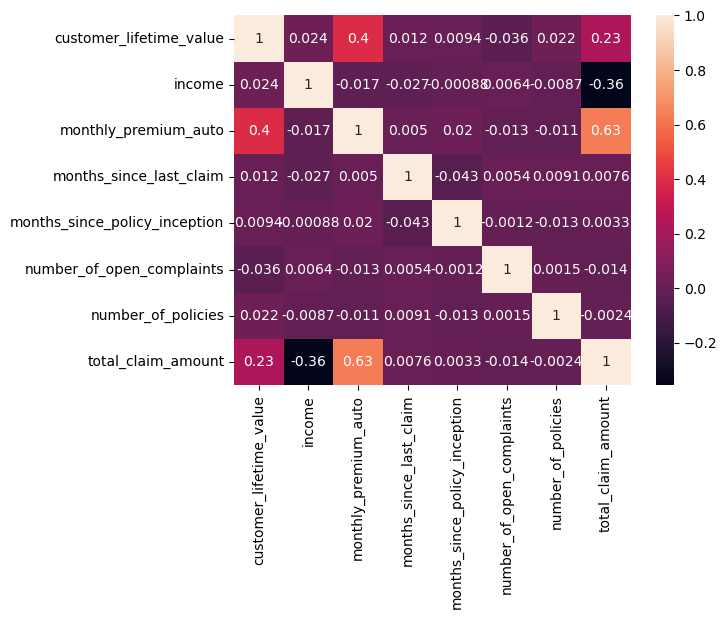

In [44]:
sns.heatmap(numerical.corr(), annot=True) 
plt.show() 

In [45]:
# count amount of 0 values in each column
data.isin([0]).sum()

coverage                            0
customer                            0
customer_lifetime_value             0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                           2317
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           314
months_since_policy_inception      83
number_of_open_complaints        7252
number_of_policies                  0
policy                              0
policy_type                         0
renew_offer_type                    0
response                            0
sales_channel                       0
state                               0
total_claim_amount                  0
vehicle_class                       0
vehicle_size                        0
dtype: int64

The correlations were not high, so we'll try to remove insignificant variables: zero income rows 

In [46]:
# new dataframe with the column 'income' excluding values of 0 
data2 = data[data['income'] != 0]

numerical2 = data2.select_dtypes(include=np.number) # Select numerical columns 
categoricals2 = data2.select_dtypes(include=object) # Select categorical columns
correlation_matrix2 = numerical2.corr()
correlation_matrix2 

customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.002915   
income                                        0.002915  1.000000   
monthly_premium_auto                          0.399491 -0.012372   
months_since_last_claim                       0.018531 -0.034453   
months_since_policy_inception                 0.011275  0.015799   
number_of_open_complaints                    -0.025038  0.016642   
number_of_policies                            0.022683 -0.001324   
total_claim_amount                            0.245464 -0.221879   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.399491                 0.018531   
income                                    -0.012372                -0.034453   
monthly_premium_auto                       1.000000                 0.005887   
months_since_last_claim                    0.005887                 1.000000   
months_since_policy_inception              0.020112                -0.039993   
number_of_open_complaints                 -0.006476                 0.007744   
number_of_policies                        -0.026795                 0.017022   
total_claim_amount                         0.636084                 0.001460   

                               months_since_policy_inception  \
customer_lifetime_value                             0.011275   
income                                              0.015799   
monthly_premium_auto                                0.020112   
months_since_last_claim                            -0.039993   
months_since_policy_inception                       1.000000   
number_of_open_complaints                           0.005763   
number_of_policies                                 -0.020548   
total_claim_amount                                 -0.003734   

                               number_of_open_complaints  number_of_policies  \
customer_lifetime_value                        -0.025038            0.022683   
income                                          0.016642           -0.001324   
monthly_premium_auto                           -0.006476           -0.026795   
months_since_last_claim                         0.007744            0.017022   
months_since_policy_inception                   0.005763           -0.020548   
number_of_open_complaints                       1.000000            0.010004   
number_of_policies                              0.010004            1.000000   
total_claim_amount                             -0.011664           -0.012253   

                               total_claim_amount  
customer_lifetime_value                  0.245464  
income                                  -0.221879  
monthly_premium_auto                     0.636084  
months_since_last_claim                  0.001460  
months_since_policy_inception           -0.003734  
number_of_open_complaints               -0.011664  
number_of_policies                      -0.012253  
total_claim_amount                       1.000000

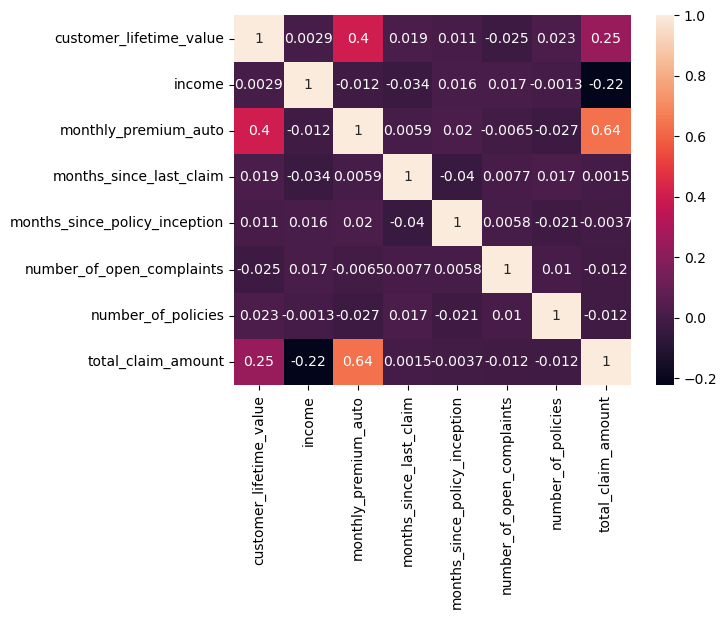

In [47]:
sns.heatmap(numerical2.corr(), annot=True) 
plt.show() 

### Lab | Customer Analysis Round 5

In [48]:
# Processing Data (Further processing...)  
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [49]:
# X-y split.
y = numerical2.drop(['total_claim_amount'], axis=1) 
X = numerical2['total_claim_amount'] 

display(X.head())
display(y.head()) 

0    384.81
2    566.47
4    138.13
5    159.38
6    321.60
Name: total_claim_amount, dtype: float64

customer_lifetime_value  income  monthly_premium_auto  \
0                  2763.52   56274                    69   
2                 12887.43   48767                   108   
4                  2813.69   43836                    73   
5                  8256.30   62902                    69   
6                  5380.90   55350                    67   

   months_since_last_claim  months_since_policy_inception  \
0                       32                              5   
2                       18                             38   
4                       12                             44   
5                       14                             94   
6                        0                             13   

   number_of_open_complaints  number_of_policies  
0                          0                   1  
2                          0                   2  
4                          0                   1  
5                          0                   2  
6                          0                   9

In [50]:
dfpremiumauto = data2[["monthly_premium_auto"]] 
dfpremiumauto 


monthly_premium_auto
0                       69
2                      108
4                       73
5                       69
6                       67
...                    ...
9127                    64
9128                   104
9129                    73
9130                    79
9132                    96

[6817 rows x 1 columns]

In [51]:
# Normalize (numerical). 
transformer2 = MinMaxScaler().fit(dfpremiumauto)
x_normalized2 = transformer2.transform(dfpremiumauto)
print(x_normalized2.shape)
x_normalized2
display(pd.DataFrame(x_normalized2, columns=dfpremiumauto.columns).describe()) 
x_normalized2_df = pd.DataFrame(x_normalized2, columns=dfpremiumauto.columns)


transformer3 = StandardScaler().fit(dfpremiumauto)
x_normalized3 = transformer3.transform(dfpremiumauto)
print(x_normalized3.shape)
x_normalized3
display(pd.DataFrame(x_normalized3, columns=dfpremiumauto.columns).describe()) 
x_normalized3_df = pd.DataFrame(x_normalized3, columns=dfpremiumauto.columns)

(6817, 1)


monthly_premium_auto
count           6817.000000
mean               0.135437
std                0.146674
min                0.000000
25%                0.029661
50%                0.093220
75%                0.203390
max                1.000000

(6817, 1)


monthly_premium_auto
count          6.817000e+03
mean           7.379636e-18
std            1.000073e+00
min           -9.234502e-01
25%           -7.212119e-01
50%           -2.878439e-01
75%            4.633271e-01
max            5.894872e+00

ValueError: Could not interpret value `monthly_premium_auto` for parameter `x`

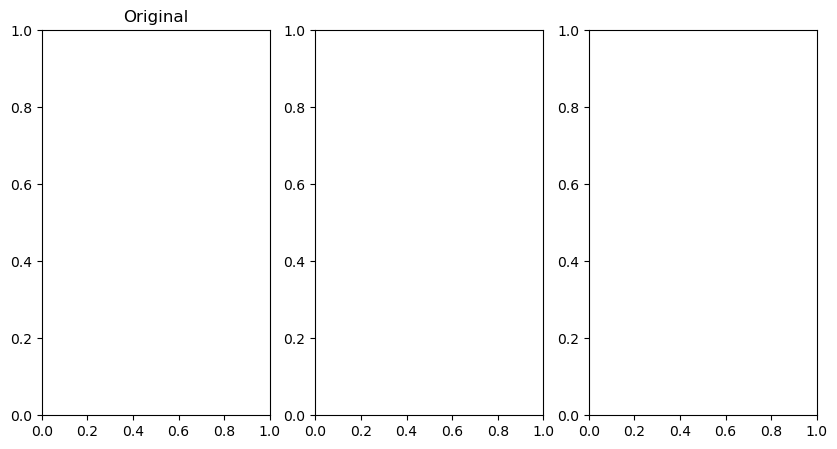

In [52]:

# show sns histplot for normal data, normalized data and standardized data

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].set_title("Original")
sns.histplot(data2=dfpremiumauto, x="monthly_premium_auto", ax=ax[0])
ax[1].set_title("MinMaxScaler")
sns.histplot(data2=x_normalized2_df, x="monthly_premium_auto", ax=ax[1])
ax[2].set_title("StandardScaler")
sns.histplot(data2=x_normalized3_df, x="monthly_premium_auto", ax=ax[2])

plt.tight_layout()
plt.show()


### Lab | Customer Analysis Round 6

In [ ]:
# For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

In [ ]:
# Get the data
#      We are using the marketing_customer_analysis.csv file.

# Dealing with the data
#      Already done in the round 2.

# Explore the data
#      Done in the round 3.

# Processing Data
# (Further processing...)
#      X-y split. (done)
#      Normalize (numerical). (done)

## Processing Data

In [53]:

# Get the categorical variables from our dataframe. 
categoricals = data.select_dtypes(include=object) 
categoricals.head() 


# One Hot (categorical). 
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(categoricals) 
encoded = encoder.transform(categoricals).toarray() 
onehot_encoded = pd.DataFrame(encoded,columns=encoder.get_feature_names(categoricals.columns))
display(onehot_encoded.head(20))




c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


coverage_Extended  coverage_Premium  customer_AA11235  customer_AA16582  \
0                 0.0               0.0               0.0               0.0   
1                 1.0               0.0               0.0               0.0   
2                 0.0               1.0               0.0               0.0   
3                 0.0               0.0               0.0               0.0   
4                 0.0               0.0               0.0               0.0   
5                 0.0               0.0               0.0               0.0   
6                 0.0               0.0               0.0               0.0   
7                 0.0               1.0               0.0               0.0   
8                 0.0               0.0               0.0               0.0   
9                 1.0               0.0               0.0               0.0   
10                0.0               0.0               0.0               0.0   
11                0.0               0.0               0.0               0.0   
12                0.0               1.0               0.0               0.0   
13                0.0               0.0               0.0               0.0   
14                0.0               0.0               0.0               0.0   
15                0.0               0.0               0.0               0.0   
16                0.0               0.0               0.0               0.0   
17                0.0               0.0               0.0               0.0   
18                0.0               0.0               0.0               0.0   
19                0.0               1.0               0.0               0.0   

    customer_AA30683  customer_AA34092  customer_AA35519  customer_AA56476  \
0                0.0               0.0               0.0               0.0   
1                0.0               0.0               0.0               0.0   
2                0.0               0.0               0.0               0.0   
3                0.0               0.0               0.0               0.0   
4                0.0               0.0               0.0               0.0   
5                0.0               0.0               0.0               0.0   
6                0.0               0.0               0.0               0.0   
7                0.0               0.0               0.0               0.0   
8                0.0               0.0               0.0               0.0   
9                0.0               0.0               0.0               0.0   
10               0.0               0.0               0.0               0.0   
11               0.0               0.0               0.0               0.0   
12               0.0               0.0               0.0               0.0   
13               0.0               0.0               0.0               0.0   
14               0.0               0.0               0.0               0.0   
15               0.0               0.0               0.0               0.0   
16               0.0               0.0               0.0               0.0   
17               0.0               0.0               0.0               0.0   
18               0.0               0.0               0.0               0.0   
19               0.0               0.0               0.0               0.0   

    customer_AA69265  customer_AA71604  ...  state_Nevada  state_Oregon  \
0                0.0               0.0  ...           0.0           0.0   
1                0.0               0.0  ...           0.0           0.0   
2                0.0               0.0  ...           1.0           0.0   
3                0.0               0.0  ...           0.0           0.0   
4                0.0               0.0  ...           0.0           0.0   
5                0.0               0.0  ...           0.0           1.0   
6                0.0               0.0  ...           0.0           1.0   
7                0.0               0.0  ...           0.0           0.0   
8                0.0          

In [54]:
# Label Encoding (categorical) 
from sklearn.preprocessing import LabelEncoder 
label_encoded = categoricals.apply(LabelEncoder().fit_transform)
display(label_encoded.head(20))

coverage  customer  education  effective_to_date  employmentstatus  \
0          0       600          0                 47                 1   
1          1      5946          0                 24                 4   
2          2        96          0                 41                 1   
3          0      8016          0                 12                 4   
4          0      2488          0                 52                 1   
5          0      4947          0                 17                 1   
6          0      8433          1                 47                 1   
7          2       755          4                  9                 4   
8          0      1351          0                 18                 2   
9          1       547          1                 39                 1   
10         0      6613          1                 44                 4   
11         0      7576          1                 27                 4   
12         2      1226          4                 55                 1   
13         0      6434          3                  1                 1   
14         0      2965          1                  9                 1   
15         0       626          0                  8                 1   
16         0      2055          3                 55                 2   
17         0      4964          1                 26                 2   
18         0      7739          1                 50                 1   
19         2      1895          3                  5                 1   

    gender  location_code  marital_status  policy  policy_type  \
0        0              1               1       2            0   
1        0              1               2       5            1   
2        0              1               1       5            1   
3        1              1               1       1            0   
4        1              0               2       3            1   
5        0              0               1       5            1   
6        0              1               1       2            0   
7        1              2               2       2            0   
8        1              1               0       2            0   
9        0              2               1       7            2   
10       1              1               2       5            1   
11       0              1               1       5            1   
12       1              2               1       0            0   
13       1              1               1       2            0   
14       1              2               2       2            0   
15       0              0               1       1            0   
16       1              1               1       5            1   
17       1              1               1       4            1   
18       1              2               1       4            1   
19       0              1               1       1            0   

    renew_offer_type  response  sales_channel  state  vehicle_class  \
0                  0         0              0      4              5   
1                  2         0              0      0              0   
2                  0         0              0      2              5   
3                  0         0              2      1              3   
4                  0         0              0      4              0   
5                  1         1              3      3              5   
6                  0         1              0      3              0   
7                  0         0              0      0              0   
8                  0         1              0      3              0   
9                  1         0              1      3              0   
10                 0         0              0      1              0   
11                 1         0              0      1              3   
12                 1         0              0      1              0   
13                 1         1              1      0              3 

In [55]:
# Concat DataFrames 
data = pd.concat([data, onehot_encoded, label_encoded], axis=1)
data.head() 

coverage customer  customer_lifetime_value education effective_to_date  \
0     Basic  BU79786                  2763.52  Bachelor           2/24/11   
1  Extended  QZ44356                  6979.54  Bachelor           1/31/11   
2   Premium  AI49188                 12887.43  Bachelor           2/19/11   
3     Basic  WW63253                  7645.86  Bachelor           1/20/11   
4     Basic  HB64268                  2813.69  Bachelor            2/3/11   

  employmentstatus gender  income  location_code  marital_status  ...  \
0         Employed      F   56274       Suburban         Married  ...   
1       Unemployed      F       0       Suburban          Single  ...   
2         Employed      F   48767       Suburban         Married  ...   
3       Unemployed      M       0       Suburban         Married  ...   
4         Employed      M   43836          Rural          Single  ...   

   location_code  marital_status  policy  policy_type  renew_offer_type  \
0              1               1       2            0                 0   
1              1               2       5            1                 2   
2              1               1       5            1                 0   
3              1               1       1            0                 0   
4              0               2       3            1                 0   

  response sales_channel state vehicle_class vehicle_size  
0        0             0     4             5            1  
1        0             0     0             0            1  
2        0             0     2             5            1  
3        0             2     1             3            1  
4        0             0     4             0            1  

[5 rows x 9274 columns]

In [56]:
object_cols = data.select_dtypes(include=['object']).columns.tolist()
if len(object_cols) > 0:
    print(f"The following columns have object datatype: {object_cols}")
else:
    print("No columns with object datatype found.")

The following columns have object datatype: ['coverage', 'customer', 'education', 'effective_to_date', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy', 'policy_type', 'renew_offer_type', 'response', 'sales_channel', 'state', 'vehicle_class', 'vehicle_size']


## Linear Regression

In [57]:
X = numerical.drop(['total_claim_amount'], axis=1)
y = numerical['total_claim_amount']

In [ ]:
# Train-test split 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(7307, 7)
(1827, 7)
(7307,)
(1827,)


In [58]:
print(X_train.shape)


NameError: name 'X_train' is not defined

In [ ]:
my_list = X_train
for value in my_list:
    if isinstance(value, object):
        print(value, "is an object")
    else:
        print(value, "is not an object")


customer_lifetime_value is an object
income is an object
monthly_premium_auto is an object
months_since_last_claim is an object
months_since_policy_inception is an object
number_of_open_complaints is an object
number_of_policies is an object


In [ ]:
# Apply linear regression.
from sklearn.linear_model import LinearRegression 
lm = LinearRegression() 
lm.fit(X_train, y_train) 

LinearRegression()

## Model Validation

In [ ]:
# Description:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import sklearn.metrics as metrics

y_predictions_train = lm.predict(X_train)
y_predictions_test = lm.predict(X_test)

In [ ]:
# R2.
print(f'R2 train = {r2_score(y_train, y_predictions_train):.4f}')
print(f'R2 test = {r2_score(y_test, y_predictions_test):.4f}')

R2 train = 0.5240
R2 test = 0.4941


In [ ]:
# MSE.
print (f'MSE train = {(metrics.mean_squared_error(y_train, y_predictions_train)):.4f}')
print (f'MAE test = {(metrics.mean_squared_error(y_test, y_predictions_test)):.4f}')

MSE train = 40719.9522
MAE test = 40222.2658


In [ ]:
# RMSE.
print(f'RMSE train = {(np.sqrt(mean_squared_error(y_train,y_predictions_train))):.4f}')
print(f'RMSE test = {(np.sqrt(mean_squared_error(y_test,y_predictions_test))):.4f}')

RMSE train = 201.7919
RMSE test = 200.5549


In [ ]:
# MAE.
print (f'MAE train = {(metrics.mean_absolute_error(y_train, y_predictions_train)):.4f}')
print (f'MAE test = {(metrics.mean_absolute_error(y_test, y_predictions_test)):.4f}')

MAE train = 144.3266
MAE test = 145.3467


### Lab | Customer Analysis Round 7

For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

Remember the previous rounds. Follow the steps as shown in previous lectures and try to improve the accuracy of the model. Include both categorical columns in the exercise. Some approaches you can try in this exercise:

use the concept of multicollinearity and remove insignificant variables
use a different method of scaling the numerical variables
use a different ratio of train test split
use the transformation on numerical columns which align it more towards a normal distribution

In [ ]:
# Try to improve the linear regression model. 
# Try different transformations of the data (log, sqrt, etc.) and different model types. 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('./files_for_lab/csv_files/marketing_customer_analysis.csv')

# Initial clean 
data = data.drop_duplicates() # Drop duplicates 
data.columns = data.columns.str.lower().str.strip().str.replace(' ', '_') # Standardize column names
data = data.reindex(sorted(data.columns), axis=1).reset_index(drop = True) # Sort columns alphabetically

# Dealing with data types (trying to cast to numerical where possible)
def cast_column(col):
    try:
        col = col.astype(int) # Try to cast the column to integer
    except ValueError:
        try:
            col = col.astype(float) # If it fails, try to cast the column to float
        except ValueError:
            pass # If it fails again, leave the column as object
    return col
default_dtypes = data.dtypes # Store the default dtypes 
suggested_casts = data.apply(cast_column) # Apply the function to each column 

# Dealing with null values 
def clean_data(data):
    null_perc = data.isnull().sum() / len(data) * 100 # Calculate the percentage of null values in each column 
    for column in null_perc.index:
        if null_perc[column] > 80: # If the percentage is greater than 90%
            data = data.drop(columns = column) # Drop the column
        elif 30 < null_perc[column] <= 80: # If the percentage is between 50% and 90%
            if data[column].dtype != 'object': # If the column is numeric
                data[column] = data[column].fillna(data[column].median()) # Fill the null values with the median of the column
            else: # If the column is categorical
                data[column] = data[column].fillna(data[column].mode()[0]) # Fill the null values with the mode of the column
        else: # If the percentage can't be calculated, leave the column value as it is
            continue
    return data # Return the dataframe
data = clean_data(data) # Clean the dataframe
data = data.dropna() # Drop the remaining null values

numerical = data.select_dtypes(include=np.number) # Select numerical columns 
categoricals = data.select_dtypes(include=object) # Select categorical columns

data = cast_column(data) # Cast the dataframe to the suggested dtypes

display(data) # Display the dataframe

coverage customer  customer_lifetime_value education effective_to_date  \
0        Basic  BU79786              2763.519279  Bachelor           2/24/11   
1     Extended  QZ44356              6979.535903  Bachelor           1/31/11   
2      Premium  AI49188             12887.431650  Bachelor           2/19/11   
3        Basic  WW63253              7645.861827  Bachelor           1/20/11   
4        Basic  HB64268              2813.692575  Bachelor            2/3/11   
...        ...      ...                      ...       ...               ...   
9129     Basic  LA72316             23405.987980  Bachelor           2/10/11   
9130  Extended  PK87824              3096.511217   College           2/12/11   
9131  Extended  TD14365              8163.890428  Bachelor            2/6/11   
9132  Extended  UP19263              7524.442436   College            2/3/11   
9133  Extended  Y167826              2611.836866   College           2/14/11   

     employmentstatus gender  income location_code marital_status  ...  \
0            Employed      F   56274      Suburban        Married  ...   
1          Unemployed      F       0      Suburban         Single  ...   
2            Employed      F   48767      Suburban        Married  ...   
3          Unemployed      M       0      Suburban        Married  ...   
4            Employed      M   43836         Rural         Single  ...   
...               ...    ...     ...           ...            ...  ...   
9129         Employed      M   71941         Urban        Married  ...   
9130         Employed      F   21604      Suburban       Divorced  ...   
9131       Unemployed      M       0      Suburban         Single  ...   
9132         Employed      M   21941      Suburban        Married  ...   
9133       Unemployed      M       0      Suburban         Single  ...   

      number_of_policies        policy     policy_type  renew_offer_type  \
0                      1  Corporate L3  Corporate Auto            Offer1   
1                      8   Personal L3   Personal Auto            Offer3   
2                      2   Personal L3   Personal Auto            Offer1   
3                      7  Corporate L2  Corporate Auto            Offer1   
4                      1   Personal L1   Personal Auto            Offer1   
...                  ...           ...             ...               ...   
9129                   2   Personal L1   Personal Auto            Offer2   
9130                   1  Corporate L3  Corporate Auto            Offer1   
9131                   2  Corporate L2  Corporate Auto            Offer1   
9132                   3   Personal L2   Personal Auto            Offer3   
9133                   1  Corporate L3  Corporate Auto            Offer4   

      response sales_channel       state total_claim_amount  vehicle_class  \
0           No         Agent  Washington         384.811147   Two-Door Car   
1           No         Agent     Arizona        1131.464935  Four-Door Car   
2           No         Agent      Nevada         566.472247   Two-Door Car   
3           No   Call Center  California         529.881344            SUV   
4           No         Agent  Washington         138.130879  Four-Door Car   
...        ...           ...         ...                ...            ...   
9129        No           Web  California         198.234764  Four-Door Car   
9130       Yes        Branch  California         379.200000  Four-Door Car   
9131        No        Branch  California         790.784983  Four-Door Car   
9132        No        Branch  California         691.200000  Four-Door Car   
9133        No   Call Center  California         369.600000   Two-Door Car   

     vehicle_size  
0         Medsize  
1         Medsize  
2         Medsize  
3         Medsize  
4         Medsize  
...           ...  
9129      Medsize  
9130      Medsize  
9131      Medsize  
9132        Large  
9133      Medsize  

[9134 rows x 24 columns]

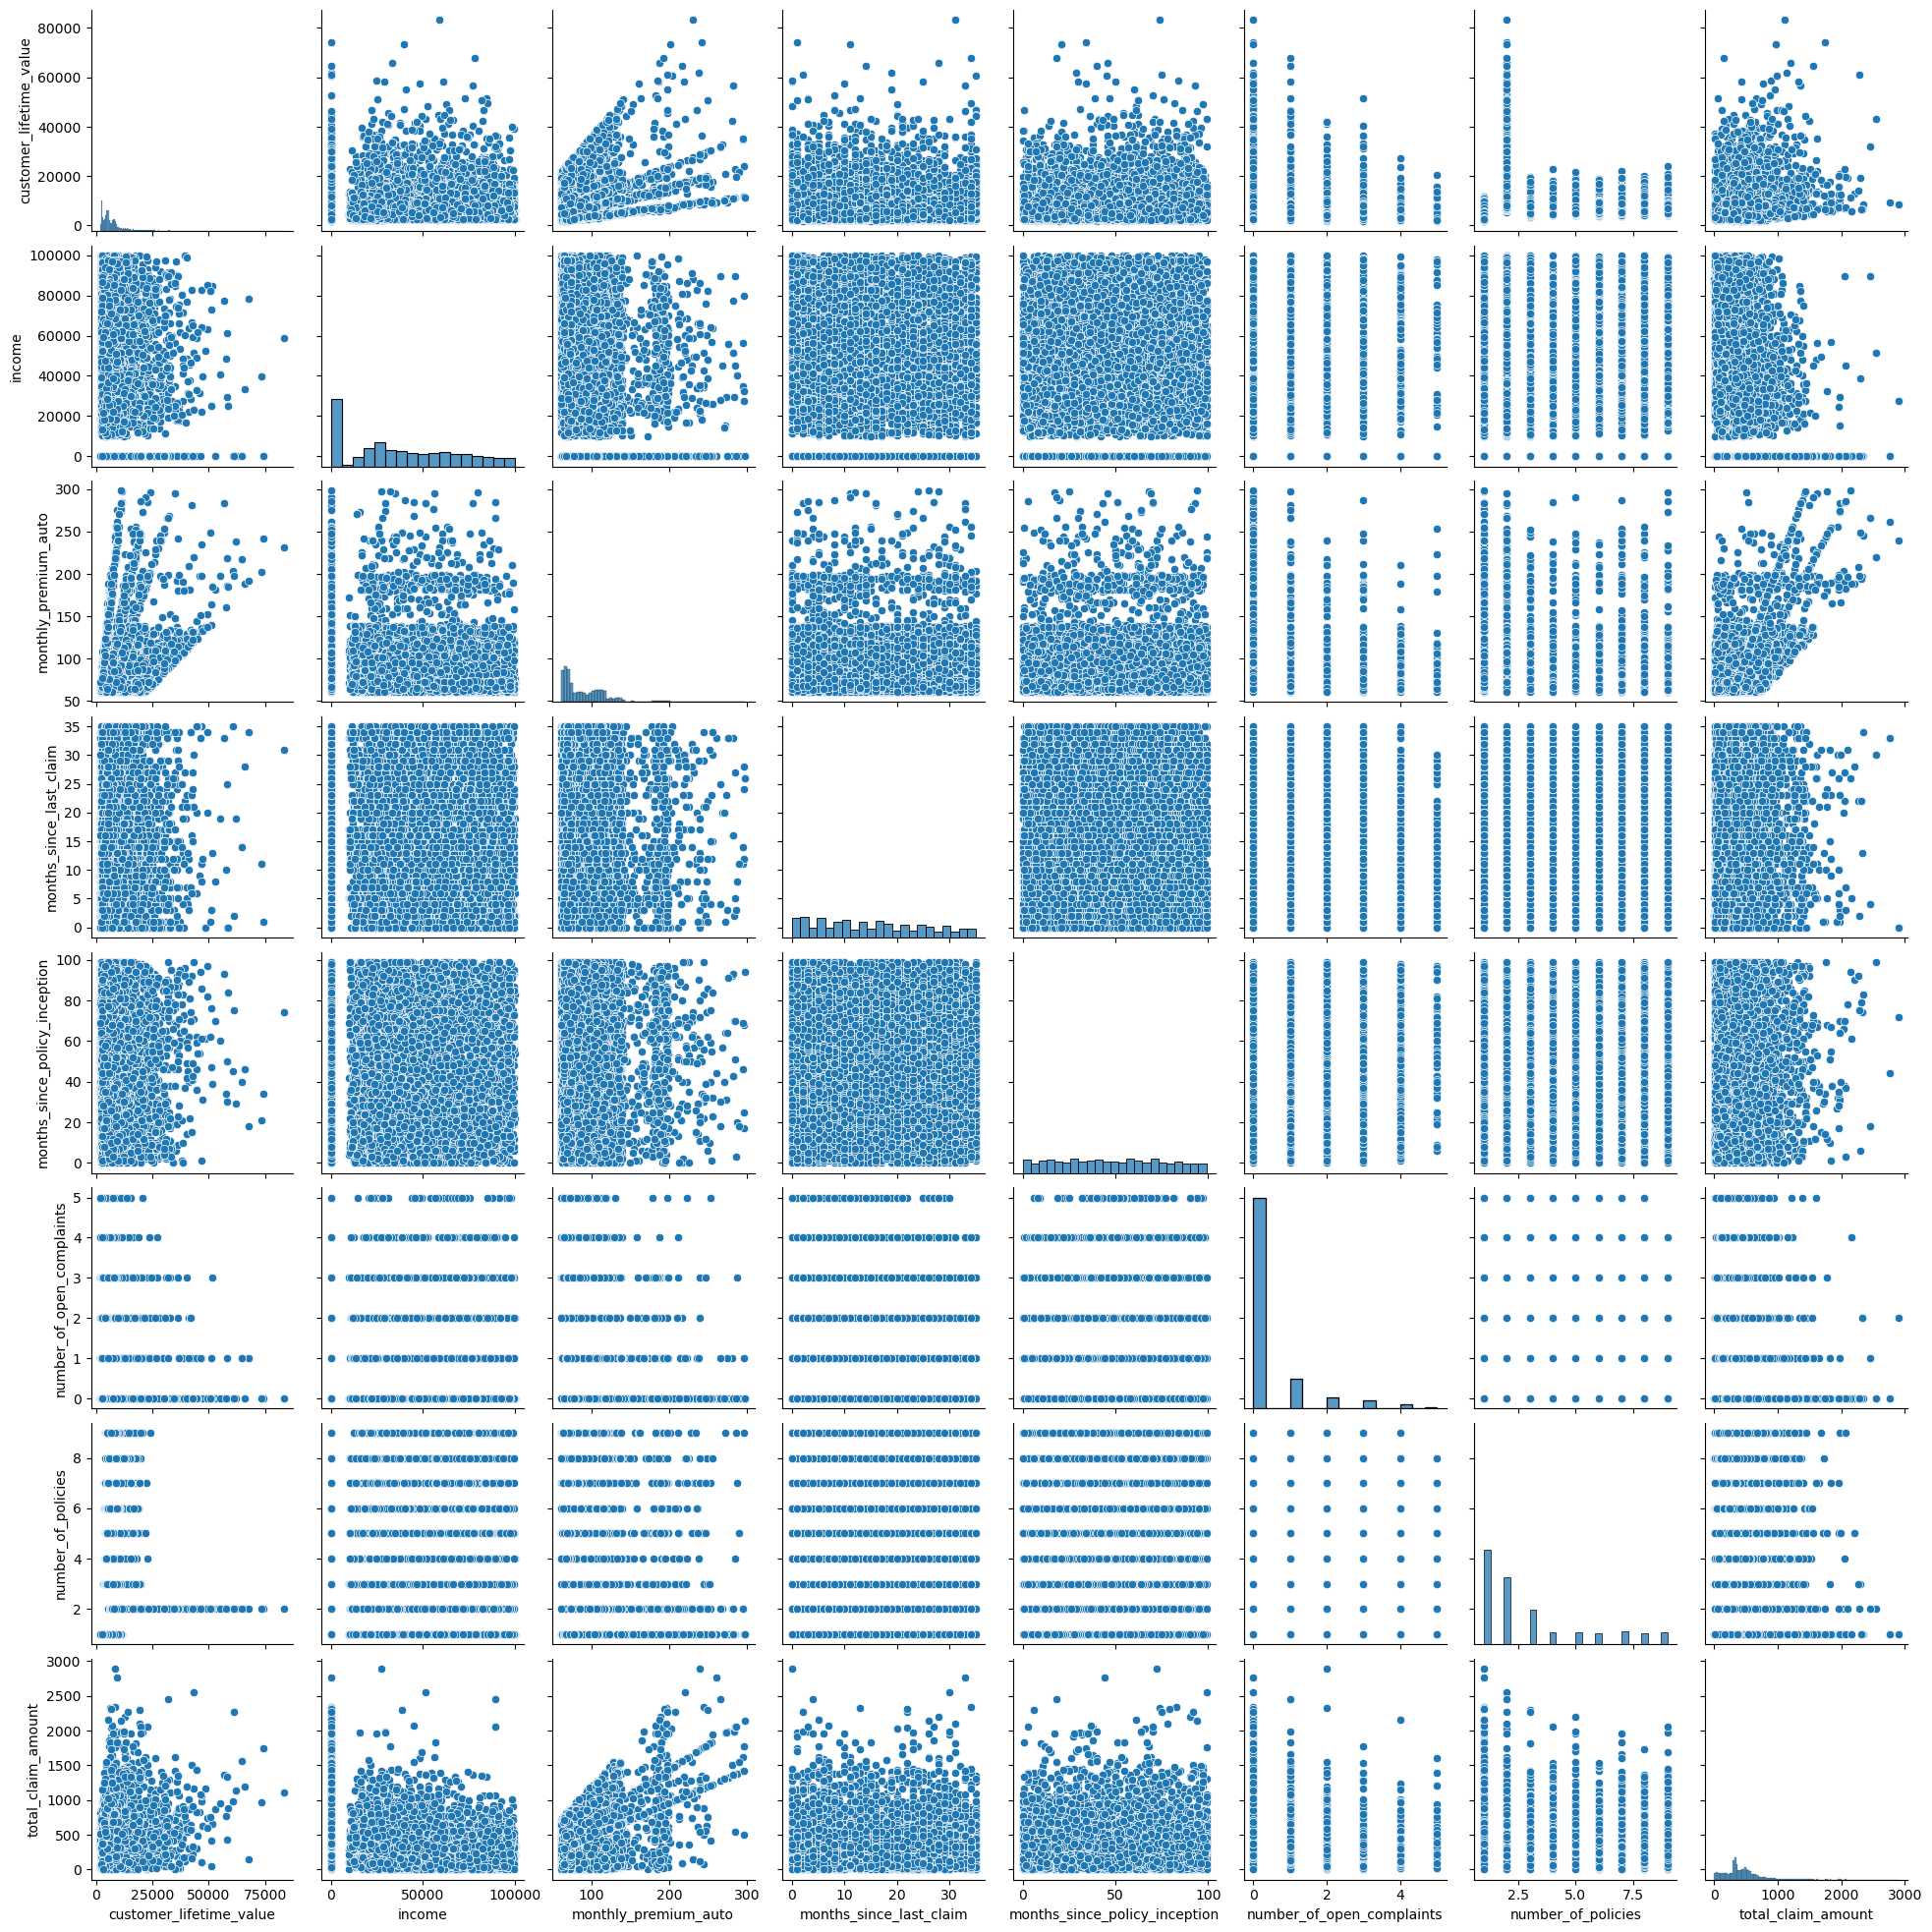

In [2]:
# what are the outliers in the numerical columns? 
sns.pairplot(data.select_dtypes(include=['float64', 'int64']))

<AxesSubplot:>

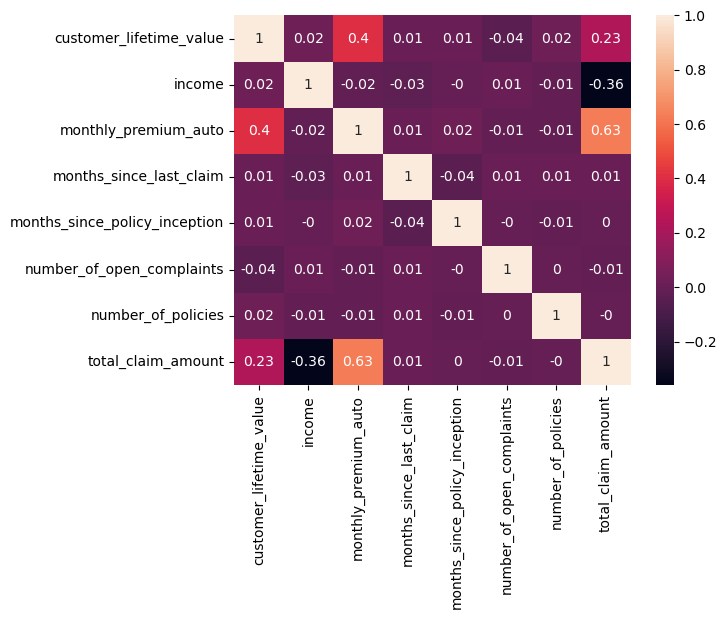

In [3]:
# Most of the histograms are skewed to the right. But the outliers are only significant in the 'income' and 'number_of_open_complaints' columns. So let's drop the outliers in those columns.
# if income = 0 then drop, and if number_of_open_complaints = 0 then drop
data = data[data['income'] != 0]
data = data[data['number_of_open_complaints'] != 0]

# Calculate the correlation matrix. 
corr_matrix = numerical.corr().round(2)
# Heatmap of the correlation matrix.
sns.heatmap(data=corr_matrix, annot=True)


customer_lifetime_value    income  monthly_premium_auto  \
0                    0.010629  0.562847              0.033755   
1                    0.062406  0.000000              0.139241   
2                    0.134960  0.487763              0.198312   
3                    0.070589  0.000000              0.189873   
4                    0.011245  0.438443              0.050633   
...                       ...       ...                   ...   
9129                 0.264137  0.719547              0.050633   
9130                 0.014719  0.216081              0.075949   
9131                 0.076951  0.000000              0.101266   
9132                 0.069098  0.219452              0.147679   
9133                 0.008766  0.000000              0.067511   

      months_since_last_claim  months_since_policy_inception  \
0                    0.914286                       0.050505   
1                    0.371429                       0.424242   
2                    0.514286                       0.383838   
3                    0.514286                       0.656566   
4                    0.342857                       0.444444   
...                       ...                            ...   
9129                 0.514286                       0.898990   
9130                 0.400000                       0.282828   
9131                 0.257143                       0.373737   
9132                 0.971429                       0.030303   
9133                 0.085714                       0.909091   

      number_of_open_complaints  number_of_policies  total_claim_amount  
0                           0.0               0.000            0.132974  
1                           0.0               0.875            0.391051  
2                           0.0               0.125            0.195764  
3                           0.0               0.750            0.183117  
4                           0.0               0.000            0.047710  
...                         ...                 ...                 ...  
9129                        0.0               0.125            0.068485  
9130                        0.0               0.000            0.131034  
9131                        0.6               0.125            0.273297  
9132                        0.0               0.250            0.238876  
9133                        0.0               0.000            0.127716  

[9134 rows x 8 columns]

customer_lifetime_value    income  monthly_premium_auto  \
0                   -0.762878  0.612827             -0.703925   
1                   -0.149245 -1.239617              0.022691   
2                    0.710636  0.365710              0.429596   
3                   -0.052263 -1.239617              0.371467   
4                   -0.755575  0.203390             -0.587666   
...                       ...       ...                   ...   
9129                 2.241590  1.128558             -0.587666   
9130                -0.714411 -0.528450             -0.413278   
9131                 0.023135 -1.239617             -0.238891   
9132                -0.069935 -0.517356              0.080820   
9133                -0.784955 -1.239617             -0.471408   

      months_since_last_claim  months_since_policy_inception  \
0                    1.678099                      -1.543287   
1                   -0.208186                      -0.217334   
2                    0.288205                      -0.360680   
3                    0.288205                       0.606907   
4                   -0.307465                      -0.145661   
...                       ...                            ...   
9129                 0.288205                       1.466984   
9130                -0.108908                      -0.719046   
9131                -0.605299                      -0.396517   
9132                 1.876656                      -1.614960   
9133                -1.200968                       1.502821   

      number_of_open_complaints  number_of_policies  total_claim_amount  
0                     -0.422250           -0.822648           -0.169640  
1                     -0.422250            2.106160            2.400737  
2                     -0.422250           -0.404247            0.455734  
3                     -0.422250            1.687759            0.329769  
4                     -0.422250           -0.822648           -1.018843  
...                         ...                 ...                 ...  
9129                  -0.422250           -0.404247           -0.811934  
9130                  -0.422250           -0.822648           -0.188956  
9131                   2.873245           -0.404247            1.227937  
9132                  -0.422250            0.014154            0.885113  
9133                  -0.422250           -0.822648           -0.222004  

[9134 rows x 8 columns]

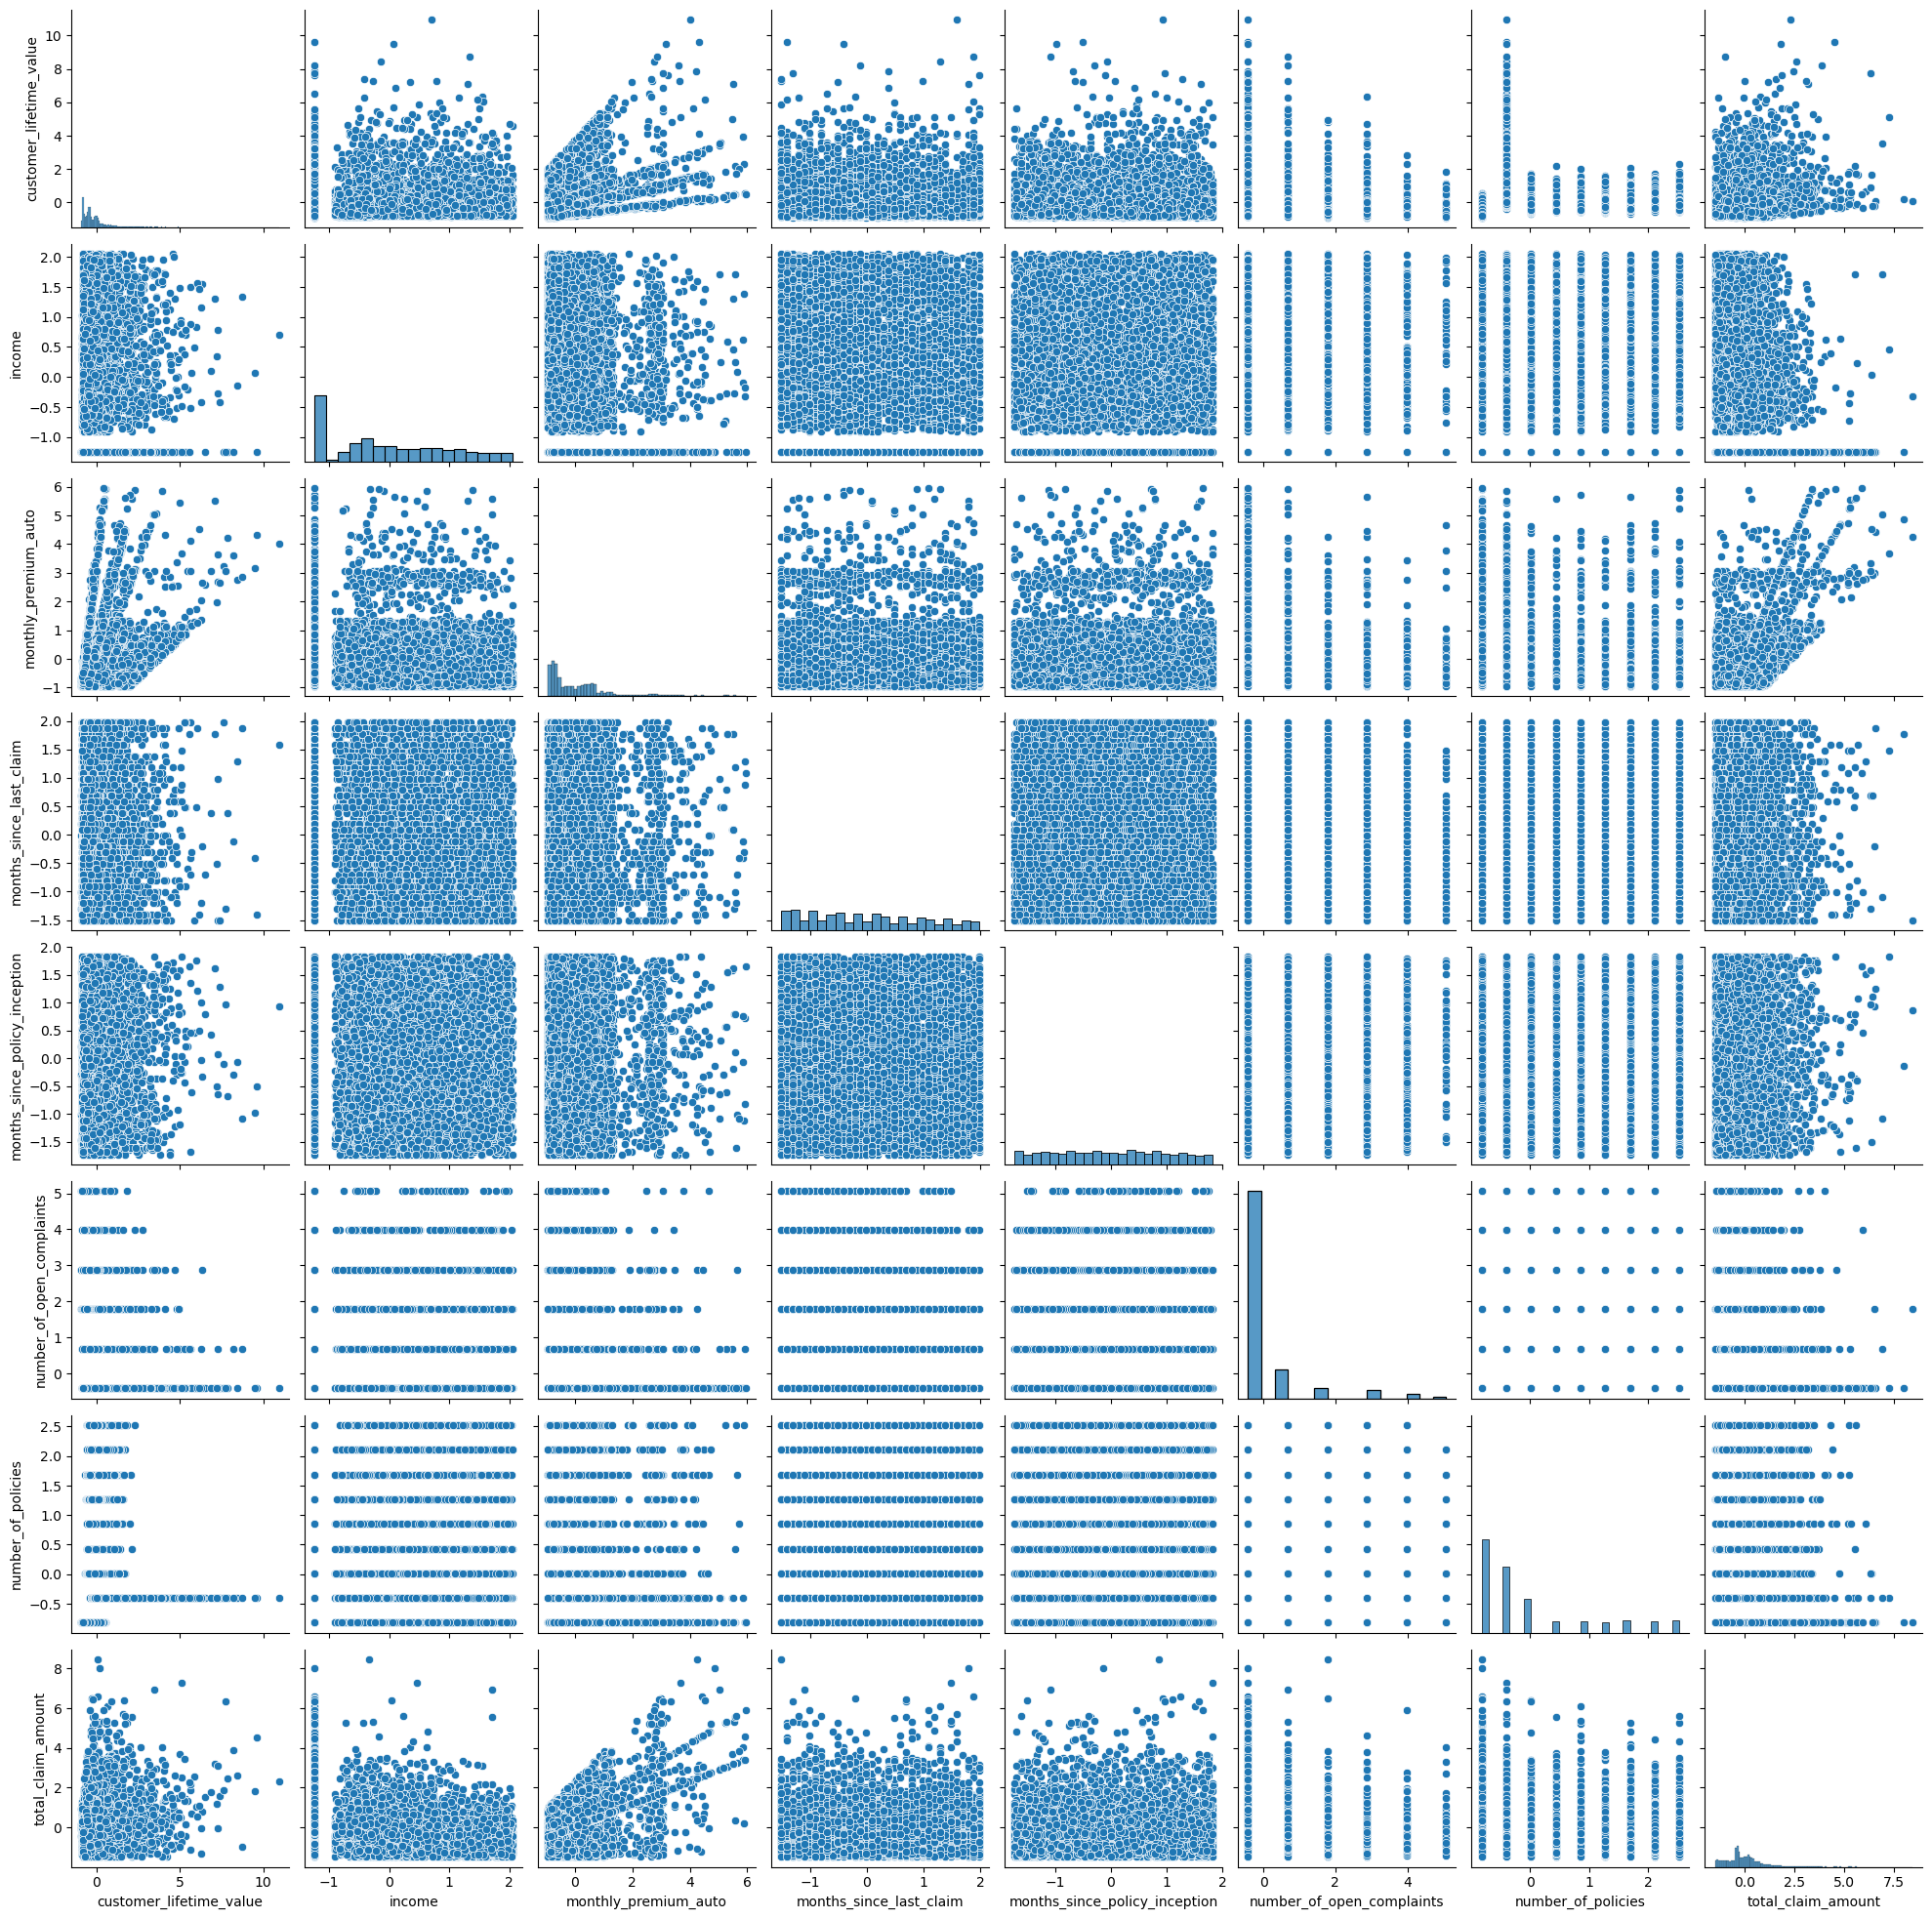

In [4]:
# No significant difference of correlation between the numerical columns. Let's try normalizing the data.
# Normalize (numerical) with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
transformMinMax = MinMaxScaler()
numerical = pd.DataFrame(transformMinMax.fit_transform(numerical), columns=numerical.columns)
display(numerical)
# Normalize (numerical) with StandardScaler
from sklearn.preprocessing import StandardScaler
transformStandard = StandardScaler()
numerical = pd.DataFrame(transformStandard.fit_transform(numerical), columns=numerical.columns)
display(numerical)
# check if the data is normally distributed for the numerical variables after normalization 
sns.pairplot(numerical)


In [ ]:
# Still not normally distributed and for that matter no good correlations. Let's check the categorical columns. 
# One Hot Encoding technique
# from sklearn.preprocessing import OneHotEncoder
# transformOneHot = OneHotEncoder(drop="first") # Drop the first column to avoid multicollinearity (dummy variable trap)
# categoricalsOneHot = pd.DataFrame(transformOneHot.fit_transform(categoricals).toarray())

# Label Encoding technique
# from sklearn.preprocessing import LabelEncoder
# transformLabel = categoricals.apply(LabelEncoder().fit_transform)

# Concatenate the numerical and categorical (now numerical) columns
# df_num_and_cat_transformed  = pd.concat([numerical, categoricalsOneHot, transformLabel], axis=1)
# display(df_num_and_cat_transformed)

In [25]:
# Let's drop the columns that are not relevant for the model using the correlation matrix with columns that have a correlation of under 0.1
numericaldropped = numerical.drop(columns=['number_of_open_complaints', 'number_of_policies', 'months_since_last_claim', 'months_since_policy_inception'])
display(numericaldropped)

customer_lifetime_value    income  monthly_premium_auto  \
0                   -0.762878  0.612827             -0.703925   
1                   -0.149245 -1.239617              0.022691   
2                    0.710636  0.365710              0.429596   
3                   -0.052263 -1.239617              0.371467   
4                   -0.755575  0.203390             -0.587666   
...                       ...       ...                   ...   
9129                 2.241590  1.128558             -0.587666   
9130                -0.714411 -0.528450             -0.413278   
9131                 0.023135 -1.239617             -0.238891   
9132                -0.069935 -0.517356              0.080820   
9133                -0.784955 -1.239617             -0.471408   

      total_claim_amount  
0              -0.169640  
1               2.400737  
2               0.455734  
3               0.329769  
4              -1.018843  
...                  ...  
9129           -0.811934  
9130           -0.188956  
9131            1.227937  
9132            0.885113  
9133           -0.222004  

[9134 rows x 4 columns]

In [26]:
# Time for Linear Regression 
# Separate the target variable from the rest of the data
y = numericaldropped['total_claim_amount']
X = numericaldropped.drop(['total_claim_amount'], axis=1)
# Split the data into train and test sets 
# The test is 20% of the data and the random state is set to 42 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Create the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train) # Fit the model 

# Check the predictions
y_predictions_train = model.predict(X_train) # Predict the target variable for the train set
y_predictions_test = model.predict(X_test) # Predict the target variable for the test set

# Evaluate the model with R2, RMSE, MAE, MSE scores 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import sklearn.metrics as metrics
print('R2 train =', r2_score(y_train, y_predictions_train))
print('R2 test =', r2_score(y_test, y_predictions_test))
print('RMSE train =', np.sqrt(mean_squared_error(y_train, y_predictions_train)))
print('RMSE test =', np.sqrt(mean_squared_error(y_test, y_predictions_test)))
print('MAE train =', metrics.mean_absolute_error(y_train, y_predictions_train))
print('MAE test =', metrics.mean_absolute_error(y_test, y_predictions_test))
print('MSE train =', metrics.mean_squared_error(y_train, y_predictions_train))
print('MSE test =', metrics.mean_squared_error(y_test, y_predictions_test))

# As a reminder, the R2 score is the percentage of the variance in the target variable that is predictable from the data.
# it should be as close to 1 as possible.
# The MAE is the average of the absolute differences between the target variable and the predictions.
# it should be as close to 0 as possible.
# The MSE is the average of the squared differences between the target variable and the predictions.
# it should be as close to 0 as possible.
# The RMSE is the square root of the MSE.
# it should be as close to 0 as possible.

R2 train = 0.5238434732131663
R2 test = 0.49427417837326704
RMSE train = 0.6948107883801823
RMSE test = 0.6903173428068997
MAE train = 0.4968955974551753
MAE test = 0.5002274244717777
MSE train = 0.4827620316494904
MSE test = 0.47653803377997866


In [36]:
# The R2 has not changed much, but the RMSE, MAE and MSE have decreased. So the model is better now but still not good enough.

# Let's try a different test size 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train) # Fit the model 

# Check the predictions
y_predictions_train = model.predict(X_train) # Predict the target variable for the train set
y_predictions_test = model.predict(X_test) # Predict the target variable for the test set

# Evaluate the model with R2, RMSE, MAE, MSE scores 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import sklearn.metrics as metrics
print('R2 train =', r2_score(y_train, y_predictions_train))
print('R2 test =', r2_score(y_test, y_predictions_test))
print('RMSE train =', np.sqrt(mean_squared_error(y_train, y_predictions_train)))
print('RMSE test =', np.sqrt(mean_squared_error(y_test, y_predictions_test)))
print('MAE train =', metrics.mean_absolute_error(y_train, y_predictions_train))
print('MAE test =', metrics.mean_absolute_error(y_test, y_predictions_test))
print('MSE train =', metrics.mean_squared_error(y_train, y_predictions_train))
print('MSE test =', metrics.mean_squared_error(y_test, y_predictions_test))


R2 train = 0.5187164038242091
R2 test = 0.5176882582743649
RMSE train = 0.6985585541445436
RMSE test = 0.6830897635423187
MAE train = 0.49961961897263607
MAE test = 0.492263839304851
MSE train = 0.48798405356851526
MSE test = 0.4666116250563008


In [ ]:
# Not conclusive, the numerical data is not good enough to predict the total claim amount. 

### Lab | Customer Analysis Final Round
For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.

01 - Problem (case study)
Data Description.
Goal.
02 - Getting Data
Read the .csv file.
03 - Cleaning/Wrangling/EDA
Change headers names.
Deal with NaN values.
Categorical Features.
Numerical Features.
Exploration.
04 - Processing Data
Dealing with outliers.
Normalization.
Encoding Categorical Data.
Splitting into train set and test set.
05 - Modeling
Apply model.
06 - Model Validation
R2.
MSE.
RMSE.
MAE.
07 - Reporting
Present results. => give a overview of the results of the model. => what is the value of the model? => how does it perform? => what are the insights? => what are the next steps?
